In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import upsetplot as up
import glob

In [13]:
# pretty_names_dir = {'B_caccae': '$B. caccae$',
#                 'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
#                 'B_ovatus': '$B. ovatus$',
#                 'B_thetaiotaomicron': '$B. thetaiotaomicron$',
#                 'B_uniformis': '$B. uniformis$',
#                 'B_vulgatus': '$B. vulgatus$',
#                 'C_aerofaciens': '$C. aerofaciens$',
#                 'C_scindens': '$C. scindens$',
#                 'C_spiroforme': '$C. spiroforme$',
#                 # 'D_longicatena': '$D. longicatena$',
#                 'P_distasonis': '$P. distasonis$',
#                 'R_obeum': '$R. obeum$'}

cols = [col for i, col in enumerate(cm.tab20.colors) if i % 2 == 0]
cols.pop(7)
cols.append(cm.tab20b.colors[4])
cols.append(cm.tab20b.colors[1])
cols.append(cm.tab20b.colors[14])
cols.append(cm.tab20b.colors[10])
cols.append(cm.tab20b.colors[17])
cols.append(cm.Dark2.colors[0])
cols.append(cm.Dark2.colors[3])
cols.append(cm.tab20.colors[1])
cols.append(cm.tab20.colors[3])
cols.append(cm.tab20.colors[5])
cols.append(cm.tab20.colors[7])
cols.append(cm.tab20.colors[9])
cols.append(cm.tab20.colors[11])
my_cmap = cm.colors.ListedColormap(cols)

pretty_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob'
                }

pretty_names_dir_ = {'B. caccae': 'Bca',
                'B. cellulosilyticus': 'Bce',
                'B. ovatus': 'Bov',
                'B. thetaiotaomicron': 'Bth',
                'B. uniformis': 'Bun',
                'B. vulgatus': 'Bvu',
                'C. aerofaciens': 'Cae',
                'C. scindens': 'Csc',
                'C. spiroforme': 'Csp',
                # 'D. longicatena': 'Dlo',
                'P. distasonis': 'Pdi',
                'R. obeum': 'Rob'
                }

In [3]:
ortho = pd.read_table('Orthogroups_SpeciesOverlaps.tsv', header = 0, index_col = 0)
ortho.columns = ortho.columns.map(pretty_names_dir)
ortho.index = ortho.index.map(pretty_names_dir)

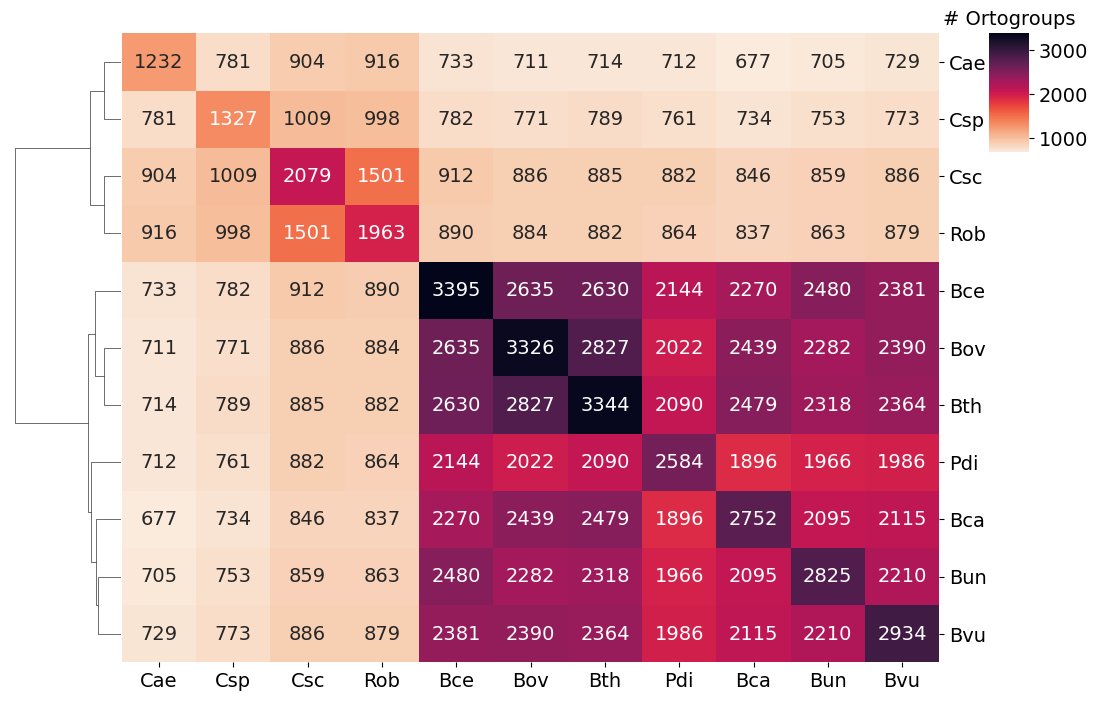

In [66]:
plt.rc('font', size=14)
ax = sns.clustermap(ortho, 
    cmap="rocket_r", 
    col_cluster=True,
    row_cluster=True, 
    dendrogram_ratio=(0.12, 0), 
    annot=True, 
    fmt="d", 
    cbar_pos=(1, 0.8, 0.04, 0.17), 
    annot_kws={'size': 14},
    figsize=(10, 7))
cax = ax.ax_heatmap
cax.set_xticklabels(cax.get_xticklabels(), rotation=0, ha='center')
cax.set_yticklabels(cax.get_yticklabels(), rotation=0, ha='left')
plt.title('# Ortogroups', fontsize=14)
plt.savefig('annotation/Ortogroups.svg', format='svg', bbox_inches='tight')
plt.show()

In [15]:
dic = {"Bc":"B. caccae", 
       "BcWH2":"B. cellulosilyticus",
       "Bo":"B. ovatus",
       "Bth":"B. thetaiotaomicron",
       "Bu":"B. uniformis",
       "Bv":"B. vulgatus",
       "Ca":"C. aerofaciens",
       "Csc":"C. scindens",
       "Csp":"C. spiroforme",
       # "Dl":"D. longicatena",
       "Pd":"P. distasonis",
       "Ro":"R. obeum"}
eggNOGs = [pd.read_table(f'{i}', header = 0, skiprows=4, skipfooter=3, engine='python') for i in glob.glob('eggNOG/*_eggNOG.tsv')]
eggNOG = pd.concat(eggNOGs, axis=0, ignore_index=True)
eggNOG['Especie'] = eggNOG['#query'].str.split('_', expand=True)[0]
eggNOG['Especie'] = eggNOG['Especie'].map(dic)
eggNOG.set_index('Especie', inplace=True)
eggNOG = eggNOG.loc[:,['COG_category']]
eggNOG = eggNOG['COG_category'].str.split('', expand=True)
eggNOG.reset_index(inplace=True)
eggNOG = eggNOG.melt(id_vars=['Especie'], value_vars=[0,1,2,3,4,5], value_name='Categoria COG').dropna()
eggNOG = eggNOG[eggNOG['Categoria COG'].isin(['', '-']) == False].loc[:,['Especie', 'Categoria COG']].set_index('Especie')
eggNOG


,Categoria COG
Especie,
B. cellulosilyticus,S
B. cellulosilyticus,K
B. cellulosilyticus,P
B. cellulosilyticus,E
B. cellulosilyticus,E
...,...
P. distasonis,P
P. distasonis,T
P. distasonis,T


In [16]:
eggNOG_stacked = eggNOG.groupby(['Categoria COG', 'Especie']).size().reset_index().pivot(columns='Categoria COG', index='Especie', values=0)
eggNOG_stacked

Categoria COG,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,S,T,U,V,Z
Especie,,,,,,,,,,,,,,,,,,,,,
B. caccae,1.0,NaN,179.0,37.0,196.0,103.0,264.0,158.0,63.0,167.0,...,349.0,11.0,94.0,258.0,23.0,819.0,142.0,69.0,91.0,NaN
B. cellulosilyticus,1.0,NaN,207.0,41.0,224.0,114.0,547.0,189.0,105.0,169.0,...,459.0,23.0,97.0,321.0,56.0,1267.0,242.0,99.0,134.0,NaN
B. ovatus,1.0,NaN,213.0,45.0,215.0,118.0,508.0,186.0,85.0,165.0,...,394.0,26.0,105.0,363.0,42.0,1177.0,204.0,91.0,102.0,3.0
B. thetaiotaomicron,1.0,NaN,211.0,47.0,217.0,115.0,437.0,180.0,75.0,169.0,...,428.0,28.0,98.0,336.0,29.0,1165.0,193.0,113.0,104.0,NaN
B. uniformis,1.0,NaN,167.0,33.0,199.0,99.0,332.0,165.0,66.0,163.0,...,349.0,17.0,76.0,221.0,24.0,929.0,142.0,92.0,84.0,NaN
B. vulgatus,1.0,NaN,179.0,50.0,217.0,108.0,324.0,174.0,73.0,163.0,...,353.0,11.0,91.0,255.0,33.0,939.0,130.0,100.0,90.0,NaN
C. aerofaciens,NaN,1.0,105.0,38.0,152.0,61.0,148.0,108.0,36.0,153.0,...,97.0,6.0,45.0,97.0,21.0,309.0,56.0,36.0,47.0,NaN
C. scindens,NaN,NaN,205.0,51.0,184.0,106.0,173.0,167.0,64.0,167.0,...,142.0,15.0,64.0,196.0,33.0,735.0,118.0,65.0,112.0,NaN
C. spiroforme,NaN,NaN,106.0,40.0,145.0,63.0,133.0,78.0,47.0,162.0,...,149.0,11.0,44.0,92.0,15.0,440.0,73.0,25.0,75.0,1.0


In [33]:
cog = {'G':'Carbohydrate transport and metabolism', 
       'M':'Cell wall/membrane/envelope biogenesis', 
       'L':'Replication, recombination and repair', 
       'K':'Transcription', 
       'P':'Inorganic ion transport and metabolism', 
       'E':'Amino acid transport and metabolism', 
       'C':'Energy production and conversion', 
       'J':'Translation, ribosomal structure and biogenesis', 
       'H':'Coenzyme transport and metabolism', 
       'T':'Signal transduction mechanisms', 
       'F':'Nucleotide transport and metabolism', 
       'V':'Defense mechanisms',
       'O':'Post-translational modification, protein turnover, and chaperones', 
       'U':'Intracellular trafficking, secretion, and vesicular transport', 
       'I':'Lipid transport and metabolism', 
       'D':'Cell cycle control, cell division, chromosome partitioning', 
       'Q':'Secondary metabolites biosynthesis, transport, and catabolism', 
       'N':'Cell motility', 
       'Z':'Cytoskeleton', 
       'B':'Chromatin structure and dynamics', 
       'A':'RNA processing and modification'
       # 'S':'Function unkown'
       }

In [34]:
vec = []
for i in eggNOG_stacked.columns:
    vec.append((i, eggNOG_stacked[i].mean()))
vec = np.array(vec, dtype=[('COG', '<U10'), ('mean', float)])
vec.sort(order='mean')
vec = vec['COG'][::-1]
vec

array(['S', 'G', 'M', 'L', 'K', 'P', 'E', 'C', 'J', 'H', 'T', 'F', 'V',
       'O', 'U', 'I', 'D', 'Q', 'N', 'Z', 'B', 'A'], dtype='<U10')

In [35]:
eggNOG_stacked_sorted = eggNOG_stacked[vec].loc[['C. aerofaciens', 'C. spiroforme', 'R. obeum', 'C. scindens', 'B. caccae', 'B. uniformis', 'P. distasonis', 'B. vulgatus', 'B. thetaiotaomicron', 'B. ovatus', 'B. cellulosilyticus'],:]
eggNOG_stacked_sorted.index = eggNOG_stacked_sorted.index.map(pretty_names_dir_)
eggNOG_stacked_sorted.drop(columns=['S'], inplace=True)
eggNOG_stacked_sorted.columns = eggNOG_stacked_sorted.columns.map(cog)
eggNOG_stacked_sorted

Categoria COG,Carbohydrate transport and metabolism,Cell wall/membrane/envelope biogenesis,"Replication, recombination and repair",Transcription,Inorganic ion transport and metabolism,Amino acid transport and metabolism,Energy production and conversion,"Translation, ribosomal structure and biogenesis",Coenzyme transport and metabolism,Signal transduction mechanisms,...,Defense mechanisms,"Post-translational modification, protein turnover, and chaperones","Intracellular trafficking, secretion, and vesicular transport",Lipid transport and metabolism,"Cell cycle control, cell division, chromosome partitioning","Secondary metabolites biosynthesis, transport, and catabolism",Cell motility,Cytoskeleton,Chromatin structure and dynamics,RNA processing and modification
Especie,,,,,,,,,,,,,,,,,,,,,
Cae,148.0,97.0,223.0,159.0,97.0,152.0,105.0,153.0,108.0,56.0,...,47.0,45.0,36.0,36.0,38.0,21.0,6.0,NaN,1.0,NaN
Csp,133.0,149.0,253.0,181.0,92.0,145.0,106.0,162.0,78.0,73.0,...,75.0,44.0,25.0,47.0,40.0,15.0,11.0,1.0,NaN,NaN
Rob,216.0,187.0,252.0,296.0,167.0,188.0,191.0,147.0,176.0,159.0,...,89.0,71.0,52.0,56.0,62.0,35.0,25.0,NaN,1.0,NaN
Csc,173.0,142.0,307.0,334.0,196.0,184.0,205.0,167.0,167.0,118.0,...,112.0,64.0,65.0,64.0,51.0,33.0,15.0,NaN,NaN,NaN
Bca,264.0,349.0,221.0,180.0,258.0,196.0,179.0,167.0,158.0,142.0,...,91.0,94.0,69.0,63.0,37.0,23.0,11.0,NaN,NaN,1.0
Bun,332.0,349.0,253.0,200.0,221.0,199.0,167.0,163.0,165.0,142.0,...,84.0,76.0,92.0,66.0,33.0,24.0,17.0,NaN,NaN,1.0
Pdi,296.0,397.0,217.0,217.0,253.0,232.0,187.0,164.0,141.0,177.0,...,94.0,100.0,84.0,85.0,41.0,36.0,12.0,NaN,NaN,1.0
Bvu,324.0,353.0,317.0,203.0,255.0,217.0,179.0,163.0,174.0,130.0,...,90.0,91.0,100.0,73.0,50.0,33.0,11.0,NaN,NaN,1.0
Bth,437.0,428.0,319.0,277.0,336.0,217.0,211.0,169.0,180.0,193.0,...,104.0,98.0,113.0,75.0,47.0,29.0,28.0,NaN,NaN,1.0


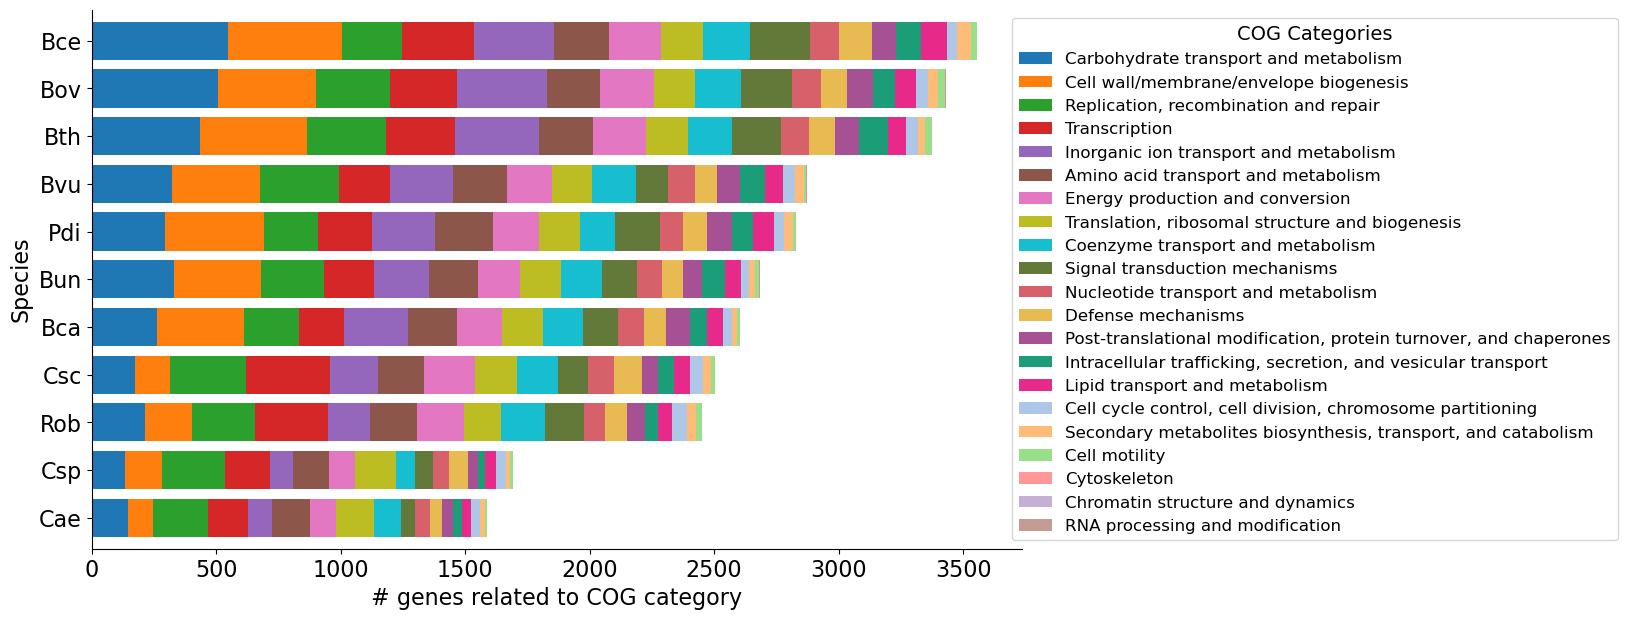

In [55]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 16})
eggNOG_stacked_sorted.plot(kind='barh', stacked=True, figsize= (12,7), colormap=my_cmap, width=0.8)
plt.legend(loc='upper right', bbox_to_anchor=(1.65, 1),
          ncol=1, fancybox=True, shadow=False, title='COG Categories', title_fontsize=14, fontsize=12)
plt.ylabel('Species')
plt.xlabel('# genes related to COG category')
plt.savefig('annotation/COG_metabolism.svg', format='svg', bbox_inches='tight')
plt.show()

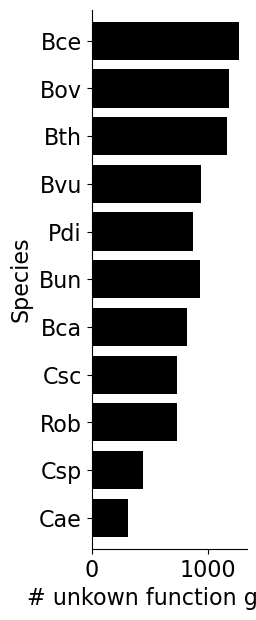

In [64]:
unknown = {'S':'Function unkown'}

eggNOG_stacked_sorted = eggNOG_stacked[vec].loc[['C. aerofaciens', 'C. spiroforme', 'R. obeum', 'C. scindens', 'B. caccae', 'B. uniformis', 'P. distasonis', 'B. vulgatus', 'B. thetaiotaomicron', 'B. ovatus', 'B. cellulosilyticus'],:]
eggNOG_stacked_sorted.index = eggNOG_stacked_sorted.index.map(pretty_names_dir_)
eggNOG_stacked_sorted = eggNOG_stacked_sorted.loc[:, ['S']]
eggNOG_stacked_sorted.columns = eggNOG_stacked_sorted.columns.map(unknown)
eggNOG_stacked_sorted

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 16})
eggNOG_stacked_sorted.plot(kind='barh', stacked=True, figsize= (2,7), color='k', width=0.8, legend=False)
# plt.legend(loc='upper right', bbox_to_anchor=(1.65, 1),
#           ncol=1, fancybox=True, shadow=False, title='COG Categories', title_fontsize=14, fontsize=12)
plt.ylabel('Species')
plt.xlabel('# unkown function genes')
plt.savefig('annotation/COG_unkown.svg', format='svg', bbox_inches='tight')
plt.show()